In [1]:
# Import DataSet
import pandas as pd
from matplotlib import pyplot as plt
# create 2 data frame. 1 for regression and another for classification
df = pd.read_excel('SWC.xlsx')

df_regression = df.copy()
df_classification = df.copy()
df.head()

,date,ppt,temp,swc,av_swc
0,25-Jun,0.00,15.15,6.853846,8.983828
1,26-Jun,3.91,15.92,7.079167,9.242175
2,27-Jun,28.54,17.55,16.808333,21.879268
3,28-Jun,5.00,17.03,17.379167,24.168394
4,29-Jun,0.07,14.43,13.500000,17.626829


In [ ]:
#Regression

In [3]:
# before doing regression separate X (ppt, temp) and Y (swc)
col_x_regr = df_regression[['ppt', 'temp']].copy()
col_y_regr = df_regression[['swc']].copy()
# col_y_regr.head()
col_x_regr.head()

,ppt,temp
0,0.00,15.15
1,3.91,15.92
2,28.54,17.55
3,5.00,17.03
4,0.07,14.43


In [4]:
# create train dataset and test dataset (70% / 30%)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(col_x_regr, col_y_regr, test_size=0.30)

# Linear Regression, MSE, MAE

In [5]:
# apply linear regression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()

l_reg.fit(xtrain, ytrain)
# l_reg.predict([[1, 73.847017]])
test_predictions = l_reg.predict(xtest)

In [6]:
# get MSE, MAE 
from sklearn.metrics import mean_squared_error, mean_absolute_error
l_reg_mse = mean_squared_error(ytest, test_predictions)
l_reg_mse

60.5273921111007

# MAE

In [9]:
l_reg_mae = mean_absolute_error(ytest, test_predictions)
l_reg_mae

6.095298736447452

# KNN Regression, MSE, MAE

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
# Weight function used in prediction = uniform
kn_reg = KNeighborsRegressor(n_neighbors=5)
kn_reg.fit(xtrain, ytrain)
# kn_reg.predict([[1, 73.847017]])
knreg_test_predictions = kn_reg.predict(xtest)

# Weight function used in prediction = distance
kn_distance_reg = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn_distance_reg.fit(xtrain, ytrain)
# kn_reg.predict([[1, 73.847017]])
knreg_distance_test_predictions = kn_distance_reg.predict(xtest)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
kn_reg_mse = mean_squared_error(ytest, knreg_test_predictions)
kn_reg_mse

57.7132012096416

In [12]:
kn_reg_mae = mean_absolute_error(ytest, knreg_test_predictions)
kn_reg_mae

6.202612612612613

In [13]:
kn_reg_distance_mse = mean_squared_error(ytest, knreg_distance_test_predictions)
kn_reg_distance_mse

59.098954124419535

In [14]:
kn_reg_distance_mae = mean_absolute_error(ytest, knreg_distance_test_predictions)
kn_reg_distance_mae

6.05606346001663

Bar Chart for obtained MSE and MAE from this 2 Algorithm

Text(0, 0.5, 'Value')

<Figure size 1440x720 with 0 Axes>

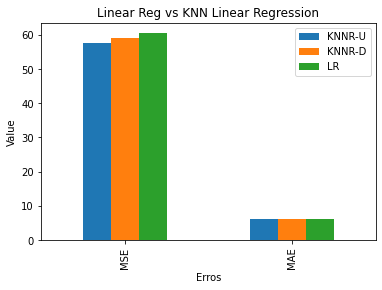

In [15]:
plt.figure(figsize=(20,10))
plotdata = pd.DataFrame({
    "KNNR-U":[kn_reg_mse, kn_reg_mae],
    "KNNR-D":[kn_reg_distance_mse, kn_reg_distance_mae],
    "LR":[l_reg_mse, l_reg_mae]
    }, 
    index=["MSE", "MAE"]
)
plotdata.plot(kind="bar")
plt.title("Linear Reg vs KNN Linear Regression")
plt.xlabel("Erros")
plt.ylabel("Value")